# "Univariate Normal Distribution ( 1D Gaussian )"
> " This post will introduce [univariate normal](https://en.wikipedia.org/wiki/Univariate_distribution#:~:text=In%20statistics%2C%20a%20univariate%20distribution,consisting%20of%20multiple%20random%20variables) distribution. It intends to explain how to represent, visualize and sample from this distribution."


- toc: true 
- badges: true
- comments: true
- categories: ['jupyter','univariate','normal']
- author : Anand Khandekar
- image: images/uni.png







This post will introduce [univariate normal](https://en.wikipedia.org/wiki/Univariate_distribution#:~:text=In%20statistics%2C%20a%20univariate%20distribution,consisting%20of%20multiple%20random%20variables) distribution. It intends to explain how to represent, visualize and sample from this distribution.

This post assumes basic knowledge of probability theory, probability distriutions and linear algebra.



The [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) , also known as the Gaussian distribution, is so called because its based on the [Gaussian function](https://en.wikipedia.org/wiki/Gaussian_function) . This distribution is defined by two parameters: the [mean](https://en.wikipedia.org/wiki/Mean) $\mu$, which is the expected value of the distribution, and the [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) $\sigma$, which corresponds to the expected deviation from the mean. The square of the standard deviation is typically referred to as the [variance](https://en.wikipedia.org/wiki/Variance) $\sigma^{2}$. We denote this distribution as:
$$\mathcal{N}(\mu, \sigma^2)$$

Given this mean and  the variance we can calculate the [probability density fucntion (pdf)](https://en.wikipedia.org/wiki/Probability_density_function) of the normal distribution with the normalised Gaussian function. For a random variable  $x$ the density is given by : 
$$p(x \mid \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp{ \left( -\frac{(x - \mu)^2}{2\sigma^2}\right)}$$

Thi distribution is called Univariate because it consists of only one random variable.

# basic dependencies imported

In [13]:
#collapse-show
# Imports
%matplotlib inline

import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm # Colormaps
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

sns.set_style('darkgrid')
np.random.seed(42)

# customized univariate function 

Instead of importing this fucntionfrom nummpy or scipy, we have created out own function which simply translates the equation and returns the single value.

In [11]:
#collapse-show
def univariate_normal(x, mean, variance):
    """pdf of the univariate normal distribution."""
    return ((1. / np.sqrt(2 * np.pi * variance)) * 
            np.exp(-(x - mean)**2 / (2 * variance)))

# Plot different Univariate Normals

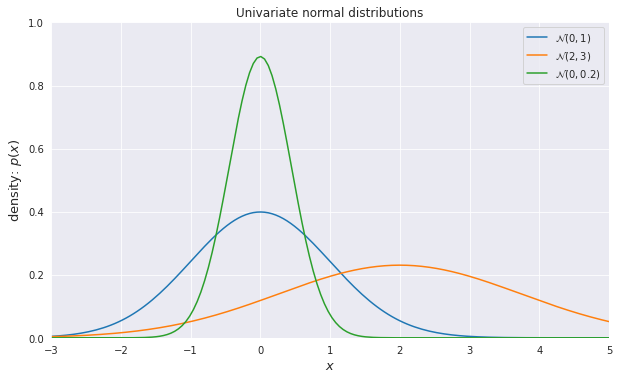

In [14]:
#collapse-show
x = np.linspace(-3, 5, num=150)
fig = plt.figure(figsize=(10, 6))
plt.plot(
    x, univariate_normal(x, mean=0, variance=1), 
    label="$\mathcal{N}(0, 1)$")
plt.plot(
    x, univariate_normal(x, mean=2, variance=3), 
    label="$\mathcal{N}(2, 3)$")
plt.plot(
    x, univariate_normal(x, mean=0, variance=0.2), 
    label="$\mathcal{N}(0, 0.2)$")
plt.xlabel('$x$', fontsize=13)
plt.ylabel('density: $p(x)$', fontsize=13)
plt.title('Univariate normal distributions')
plt.ylim([0, 1])
plt.xlim([-3, 5])
plt.legend(loc=1)
fig.subplots_adjust(bottom=0.15)
plt.show()

# Normal distribution PDF with different standard deviations
Let’s plot the probability distribution functions of a normal distribution where the mean has different standard deviations.


In [15]:
#collapse-show
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

(0.0, 0.45)

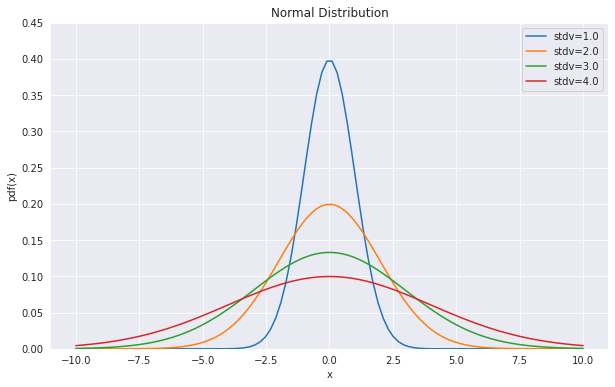

In [19]:
#collapse-show
fig, ax = plt.subplots(figsize=(10, 6))
#fig = plt.figure(figsize=(10, 6))
x = np.linspace(-10,10,100)
stdvs = [1.0, 2.0, 3.0, 4.0]
for s in stdvs:
    ax.plot(x, norm.pdf(x,scale=s), label='stdv=%.1f' % s)
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)

# Normal distribution PDF with different means
Let’s plot probability distribution functions of normal distribution where the standard deviation is 1 and different means.

(0.0, 0.45)

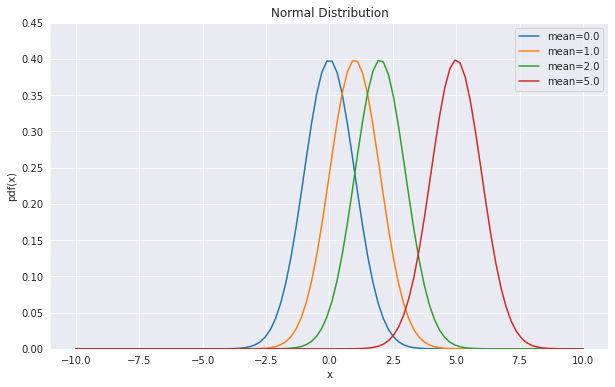

In [20]:
#collapse-show
fig, ax = plt.subplots(figsize=(10, 6))
x = np.linspace(-10,10,100)
means = [0.0, 1.0, 2.0, 5.0]
for mean in means:
    ax.plot(x, norm.pdf(x,loc=mean), label='mean=%.1f' % mean)
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)

# A cumulative normal distribution function
The cumulative distribution function of a random variable X, evaluated at x, is the probability that X will take a value less than or equal to x. Since the normal distribution is a continuous distribution, the shaded area of the curve represents the probability that X is less or equal than x.

$$P(X \leq x)=F(x)=\int \limits _{-\infty} ^{x}f(t)dt \text{, where }x\in \mathbb{R}$$

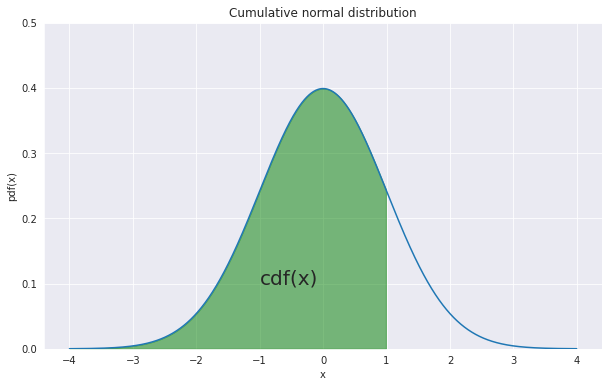

In [21]:
#collapse-show
fig, ax = plt.subplots(figsize=(10,6))
# for distribution curve
x= np.arange(-4,4,0.001)
ax.plot(x, norm.pdf(x))
ax.set_title("Cumulative normal distribution")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
# for fill_between
px=np.arange(-4,1,0.01)
ax.set_ylim(0,0.5)
ax.fill_between(px,norm.pdf(px),alpha=0.5, color='g')
# for text
ax.text(-1,0.1,"cdf(x)", fontsize=20)
plt.show()